In [109]:
import pandas as pd

In [432]:
df = pd.read_excel('IBM_Job_satisfaction.xlsm')

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       19478 non-null  int64 
 1   BusinessTravel            19478 non-null  object
 2   DailyRate                 19478 non-null  int64 
 3   Department                19478 non-null  object
 4   DistanceFromHome          19478 non-null  int64 
 5   Education                 19478 non-null  int64 
 6   EnvironmentSatisfaction   19478 non-null  int64 
 7   Gender                    19478 non-null  object
 8   HourlyRate                19478 non-null  int64 
 9   JobInvolvement            19478 non-null  int64 
 10  JobLevel                  19478 non-null  int64 
 11  JobRole                   19478 non-null  object
 12  JobSatisfaction           19478 non-null  int64 
 13  MaritalStatus             19478 non-null  object
 14  MonthlyIncome         

In [434]:
df = df[['Age', 'Department', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome', 'WorkLifeBalance','JobSatisfaction']]

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              19478 non-null  int64 
 1   Department       19478 non-null  object
 2   Education        19478 non-null  int64 
 3   Gender           19478 non-null  object
 4   JobLevel         19478 non-null  int64 
 5   MonthlyIncome    19478 non-null  int64 
 6   WorkLifeBalance  19478 non-null  int64 
 7   JobSatisfaction  19478 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


Non-numerical attrbitues

In [436]:
df['Department'].unique()[[1, 0, 2]]

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [437]:
dept_dict = {d:i for i,d in enumerate(df['Department'].unique()[[1, 0, 2]])}
dept_dict_inv = {i:d for d,i in dept_dict.items()}
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [438]:
gender_dict = {g:i for i,g in enumerate(df['Gender'].unique()[[1,0]])}
gender_dict_inv = {i:g for g,i in dept_dict.items()}
gender_dict

{'Female': 0, 'Male': 1}

In [439]:
df['Department'] = df['Department'].map(dept_dict)
df['Gender'] = df['Gender'].map(gender_dict)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              19478 non-null  int64
 1   Department       19478 non-null  int64
 2   Education        19478 non-null  int64
 3   Gender           19478 non-null  int64
 4   JobLevel         19478 non-null  int64
 5   MonthlyIncome    19478 non-null  int64
 6   WorkLifeBalance  19478 non-null  int64
 7   JobSatisfaction  19478 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [441]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,37.524489,1.246021,2.924274,0.597854,2.104990,6665.078961,2.769689,2.752849
std,8.860420,0.518838,1.026008,0.490344,1.115506,4781.062495,0.700480,1.097875
min,18.000000,0.000000,1.000000,0.000000,1.000000,1009.000000,1.000000,1.000000
25%,31.000000,1.000000,2.000000,0.000000,1.000000,3038.000000,2.000000,2.000000
50%,36.000000,1.000000,3.000000,1.000000,2.000000,5042.000000,3.000000,3.000000
75%,43.000000,2.000000,4.000000,1.000000,3.000000,8620.000000,3.000000,4.000000
max,60.000000,2.000000,5.000000,1.000000,5.000000,19999.000000,4.000000,4.000000


<AxesSubplot:>

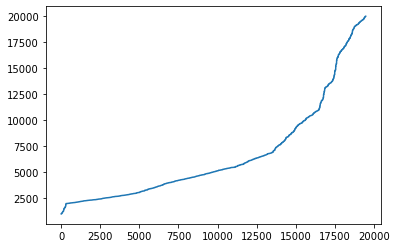

In [442]:
df['MonthlyIncome'].sort_values().plot(use_index=False)

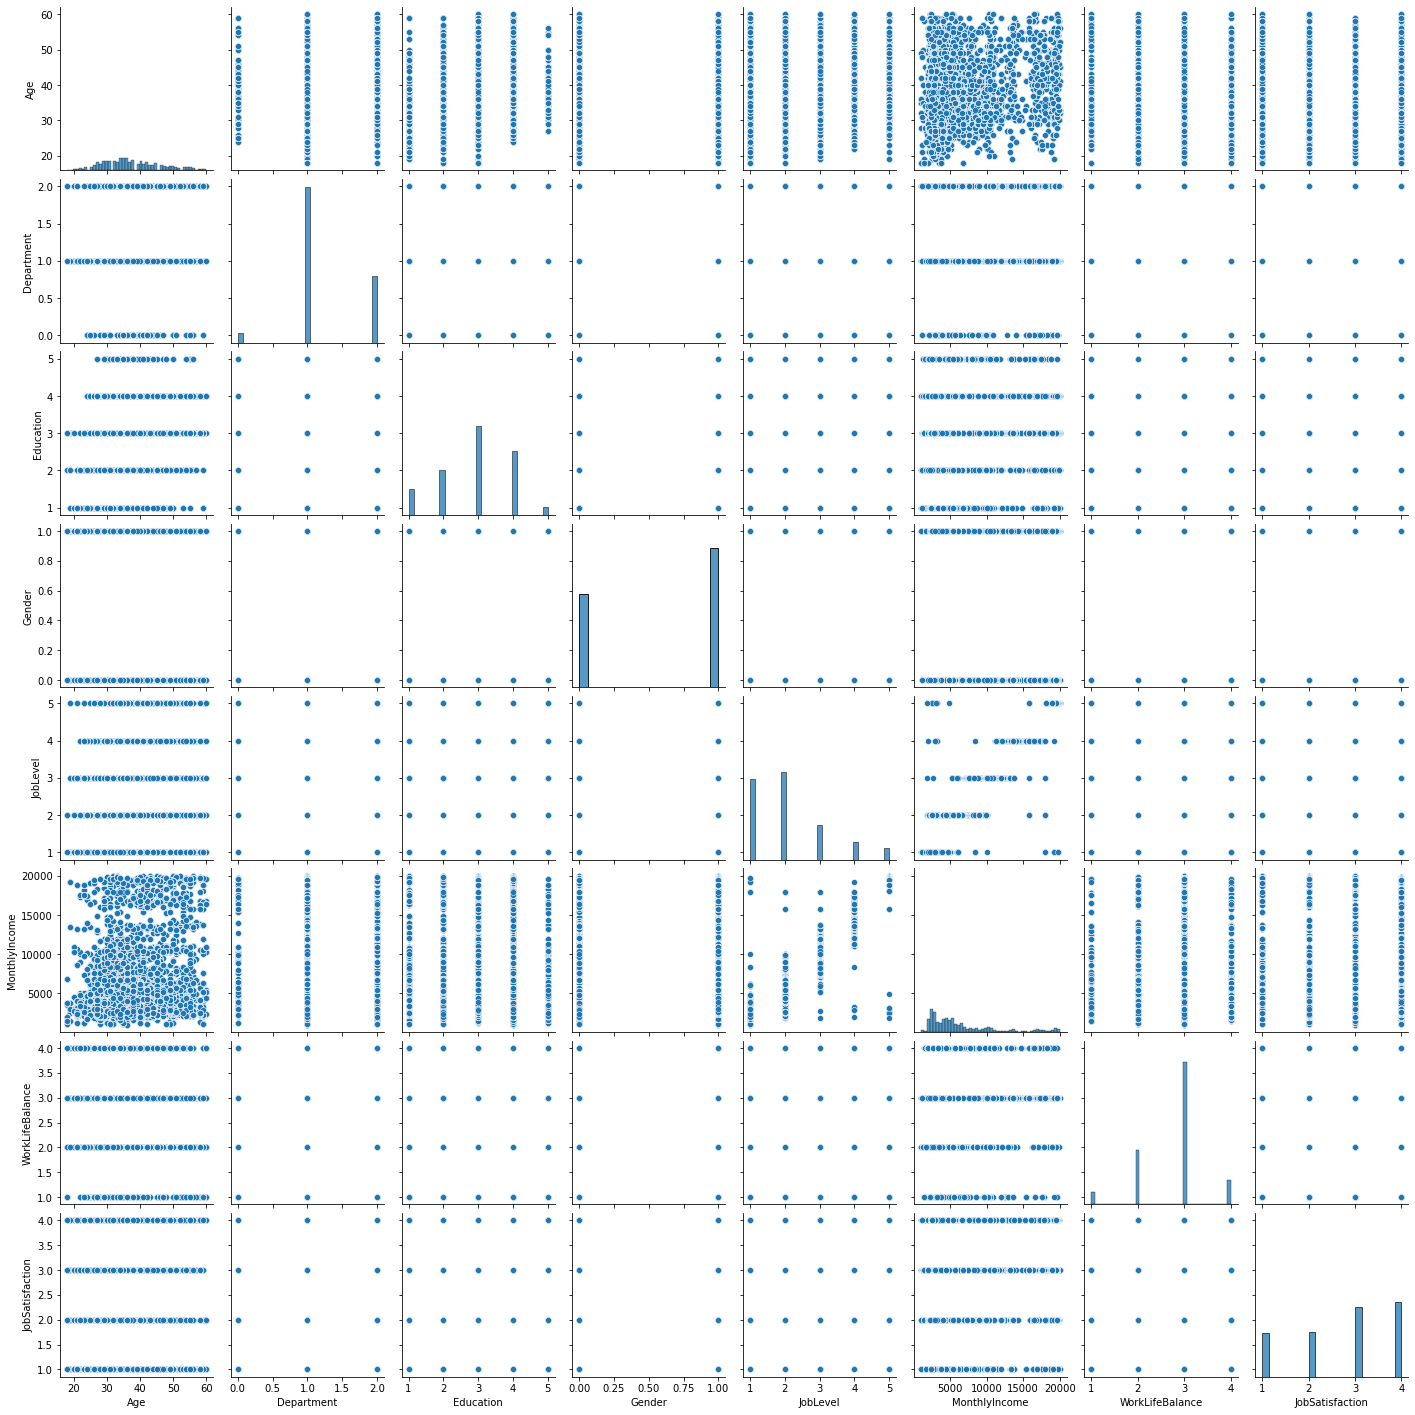

In [443]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

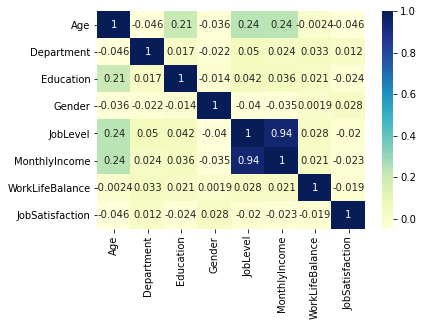

In [444]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Gender', ylabel='JobLevel'>

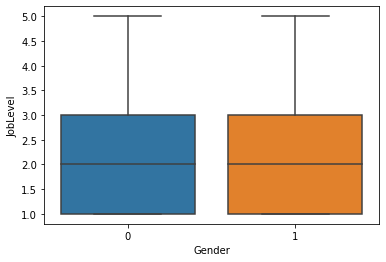

In [445]:
sns.boxplot(x='Gender', y='JobLevel', data = df)

Discretization

In [446]:
df['Age'].min(), df['Age'].max()

(18, 60)

In [447]:
def f(age):
    if age<=32:
        return '18-32'
    elif age>32 and age<=46:
        return '32-46'
    elif age>=46:
        return '46-60'
    
df['Age'] = df['Age'].map(f)

In [448]:
df['Age']

0        46-60
1        46-60
2        46-60
3        46-60
4        46-60
         ...  
19473    46-60
19474    32-46
19475    32-46
19476    46-60
19477    18-32
Name: Age, Length: 19478, dtype: object

In [449]:
age_dict = {a:i for i,a in enumerate(sorted(df['Age'].unique()))}
age_dict_inv = {i:a for a,i in age_dict.items()}
age_dict

{'18-32': 0, '32-46': 1, '46-60': 2}

In [450]:
df['Age'] = df['Age'].map(age_dict)

In [451]:
df['MonthlyIncome'].min(), df['MonthlyIncome'].max()

(1009, 19999)

In [452]:
def f(income):
    if income<=7336:
        return '1009-7336'
    elif income>7336 and income<=13669:
        return '7336-13669'
    elif income>=13669:
        return '13669-19999'
    
df['MonthlyIncome'] = df['MonthlyIncome'].map(f)

In [453]:
df['MonthlyIncome']

0         1009-7336
1         1009-7336
2         1009-7336
3         1009-7336
4         1009-7336
            ...    
19473     1009-7336
19474     1009-7336
19475     1009-7336
19476    7336-13669
19477     1009-7336
Name: MonthlyIncome, Length: 19478, dtype: object

In [454]:
income_dict = {inc:i for i,inc in enumerate(sorted(df['MonthlyIncome'].unique(), key=lambda inc: int(inc.split('-')[0])))}
income_dict_inv = {inc:a for a,inc in income_dict.items()}
income_dict

{'1009-7336': 0, '7336-13669': 1, '13669-19999': 2}

In [455]:
df['MonthlyIncome'] = df['MonthlyIncome'].map(income_dict)

In [456]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.854246,1.246021,2.924274,0.597854,2.104990,0.408358,2.769689,2.752849
std,0.680115,0.518838,1.026008,0.490344,1.115506,0.683305,0.700480,1.097875
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,1.000000,1.000000,3.000000,1.000000,2.000000,0.000000,3.000000,3.000000
75%,1.000000,2.000000,4.000000,1.000000,3.000000,1.000000,3.000000,4.000000
max,2.000000,2.000000,5.000000,1.000000,5.000000,2.000000,4.000000,4.000000


Further discretization

In [457]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df['Education'] = df['Education'].map(f)

In [458]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df['JobLevel'] = df['JobLevel'].map(f)

In [459]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(f)

In [460]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1

df['JobSatisfaction'] = df['JobSatisfaction'].map(f)

In [461]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.854246,1.246021,0.727847,0.597854,0.326317,0.408358,0.716295,0.620700
std,0.680115,0.518838,0.517016,0.490344,0.567104,0.683305,0.450807,0.485225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


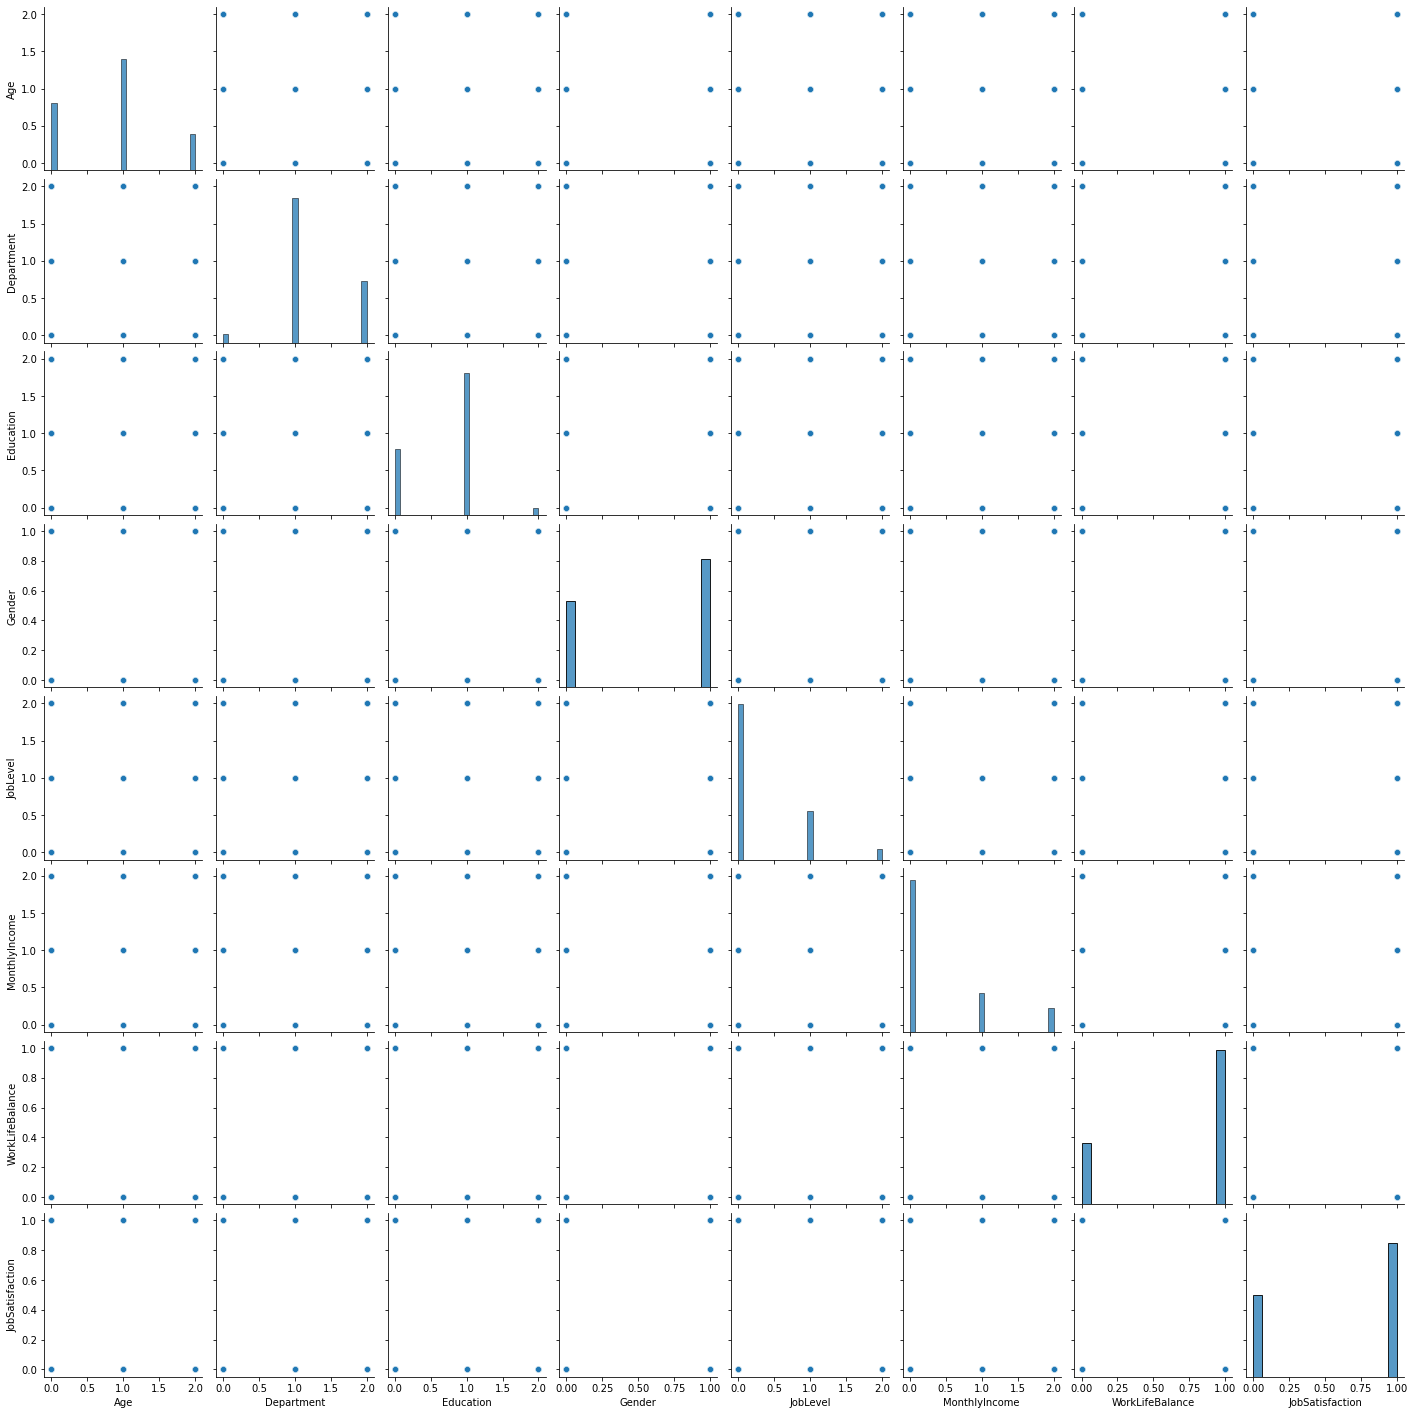

In [462]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

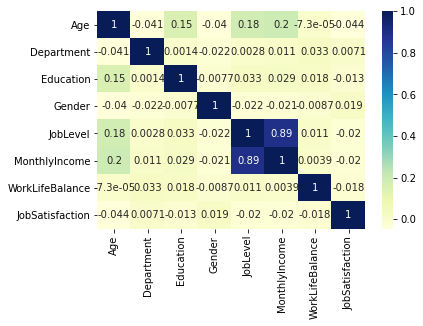

In [463]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

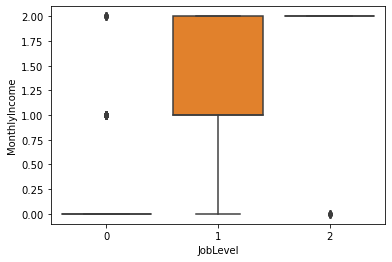

In [464]:
sns.boxplot(x='JobLevel', y='MonthlyIncome', data = df)

## Adding bias

In [476]:
import random

def add_bias(data, evidence, variable, positive=True, amount=0.2):
    data = data.copy()
    evidence_support = sorted(data[evidence].unique())
    if not positive:
        evidence_support = evidence_support[::-1]
    #print(evidence_support)
    max_variable_value = df[variable].max()
    min_variable_value = df[variable].min()
    neg_amount = amount
    pos_amount = 0.0
    step_amount = amount/(len(evidence_support)-1)
    def f(variable_value):
        if random.uniform(0,1)<=neg_amount and variable_value>min_variable_value:
            return variable_value-1
        elif random.uniform(0,1)<=pos_amount and variable_value<max_variable_value:
            return variable_value+1
        else:
            return variable_value
    for evidence_value in evidence_support:
        print(neg_amount, pos_amount)
        data.loc[df[evidence]>=evidence_value, variable] = data[variable][df[evidence]>=evidence_value].map(f)
        neg_amount -= step_amount
        pos_amount += step_amount
    
    return data

In [477]:
df_temp = df.copy()

Age - JobLevel

In [478]:
df_new = add_bias(data=df_temp, evidence='Age', variable='JobLevel', amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

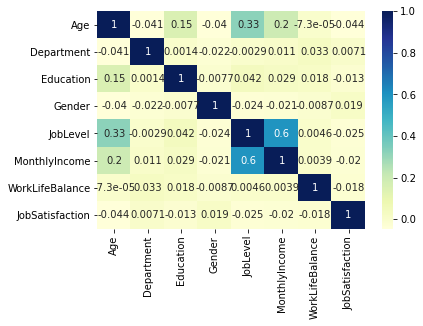

In [479]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

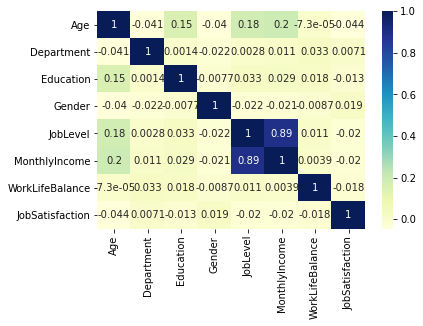

In [480]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [481]:
df_temp = df_new

Gender - JobLevel

In [484]:
df_new = add_bias(data=df_temp, evidence='Gender', variable='JobLevel', amount=0.3)

0.3 0.0
0.0 0.3


<AxesSubplot:>

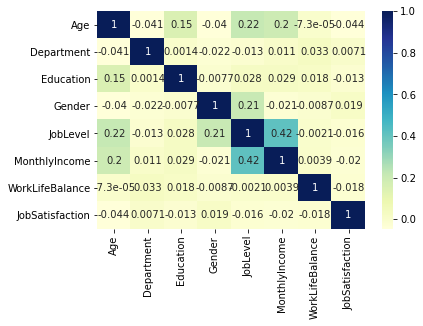

In [485]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

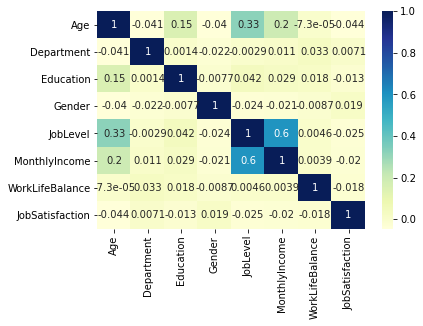

In [486]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [487]:
df_temp = df_new

Education - JobLevel

In [490]:
df_new = add_bias(data=df_temp, evidence='Education', variable='JobLevel', amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

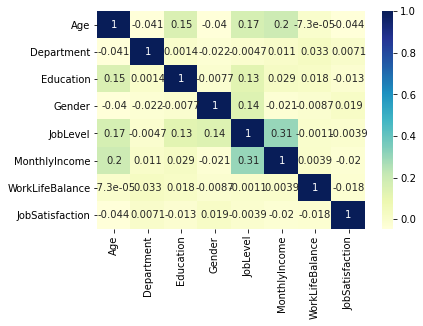

In [491]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

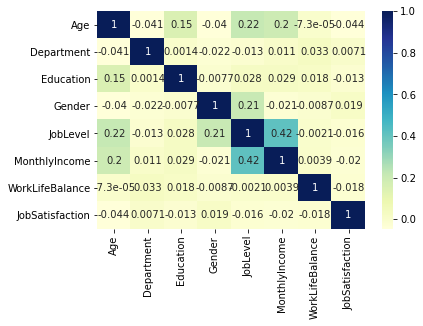

In [492]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [493]:
df_temp = df_new

JobLevel - WorkLifeBalance

In [507]:
df_new = add_bias(data=df_temp, evidence='JobLevel', variable='WorkLifeBalance', positive=False, amount=0.3)

0.3 0.0
0.15 0.15
0.0 0.3


<AxesSubplot:>

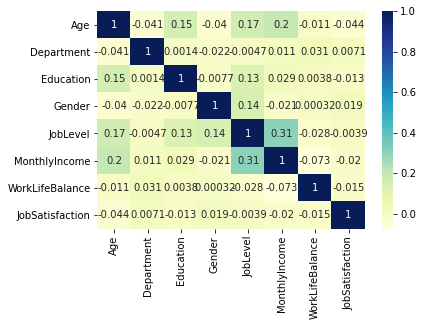

In [508]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

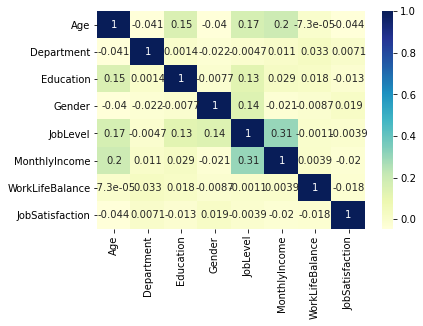

In [509]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [510]:
df_temp = df_new

Department - MonthlyIncome

In [511]:
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [512]:
df_new = add_bias(data=df_temp, evidence='Department', variable='MonthlyIncome', positive=True, amount=0.2)

0.2 0.0
0.1 0.1
0.0 0.2


<AxesSubplot:>

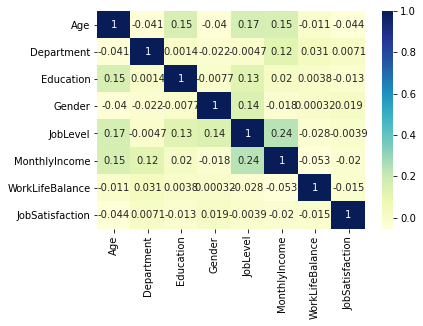

In [513]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

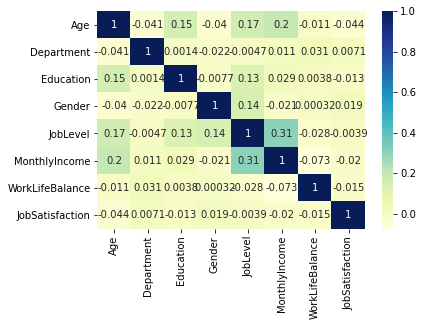

In [514]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [515]:
df_temp = df_new

Department - WorkLifeBalance

In [516]:
dept_dict

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

In [517]:
df_new = add_bias(data=df_temp, evidence='Department', variable='WorkLifeBalance', positive=False, amount=0.2)

0.2 0.0
0.1 0.1
0.0 0.2


<AxesSubplot:>

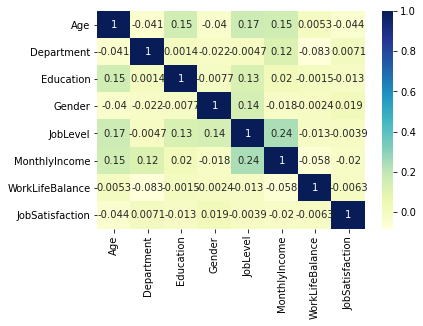

In [518]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

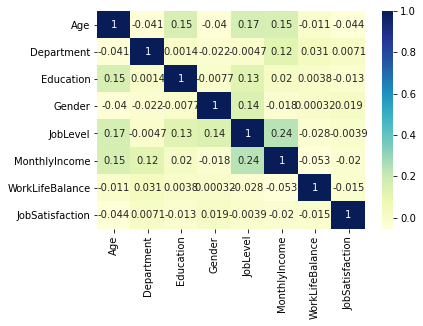

In [519]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [521]:
df_temp = df_new

MonthlyIncome - JobSatisfaction

In [522]:
df_temp.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,0.854246,1.246021,0.727847,0.597854,0.404508,0.459287,0.754492,0.620700
std,0.680115,0.518838,0.517016,0.490344,0.615634,0.685304,0.430399,0.485225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000


In [525]:
df_new = add_bias(data=df_temp, evidence='MonthlyIncome', variable='JobSatisfaction', positive=True, amount=0.4)

0.4 0.0
0.2 0.2
0.0 0.4


<AxesSubplot:>

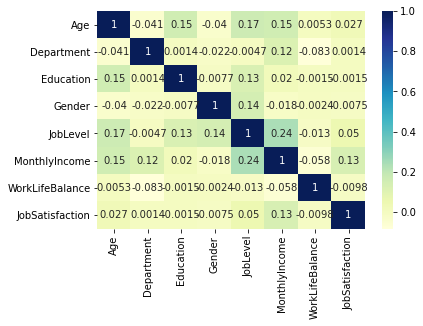

In [526]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

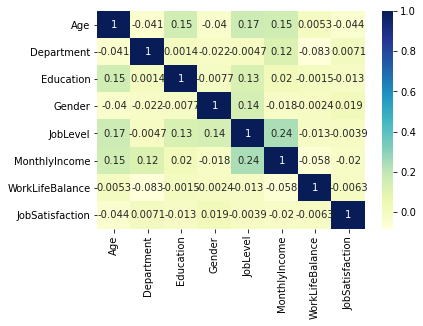

In [527]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [528]:
df_temp = df_new

WorkLifeBalance - JobSatisfaction

In [539]:
df_new = add_bias(data=df_temp, evidence='WorkLifeBalance', variable='JobSatisfaction', positive=True, amount=0.4)

0.4 0.0
0.0 0.4


<AxesSubplot:>

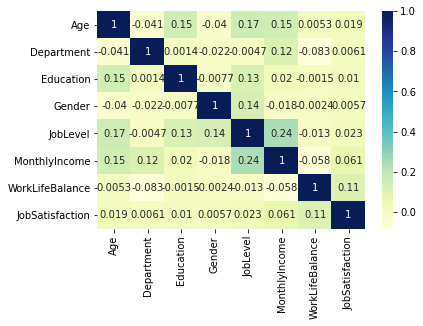

In [540]:
corr = df_new[df_new.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

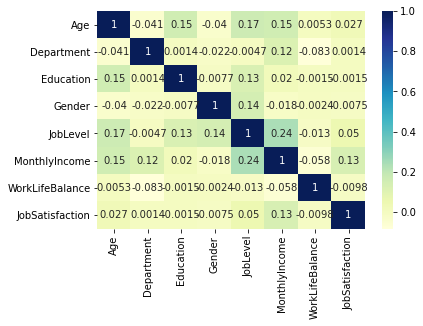

In [541]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [544]:
df_temp = df_new

JobLevel - JobSatisfaction

In [545]:
df_new = add_bias(data=df_new, evidence='JobLevel', variable='JobSatisfaction', positive=True, amount=0.4)

0.4 0.0
0.2 0.2
0.0 0.4


<AxesSubplot:>

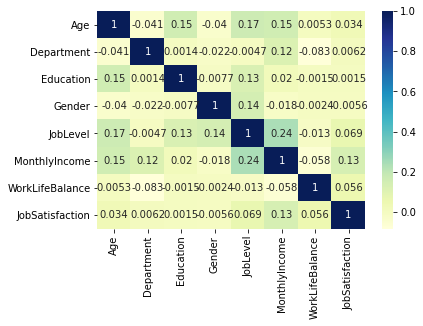

In [546]:
corr = df_new_1[df_new_1.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

<AxesSubplot:>

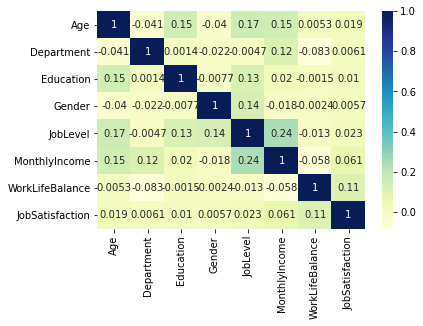

In [547]:
corr = df_temp[df_temp.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [548]:
df_temp = df_new

In [549]:
df = df_temp

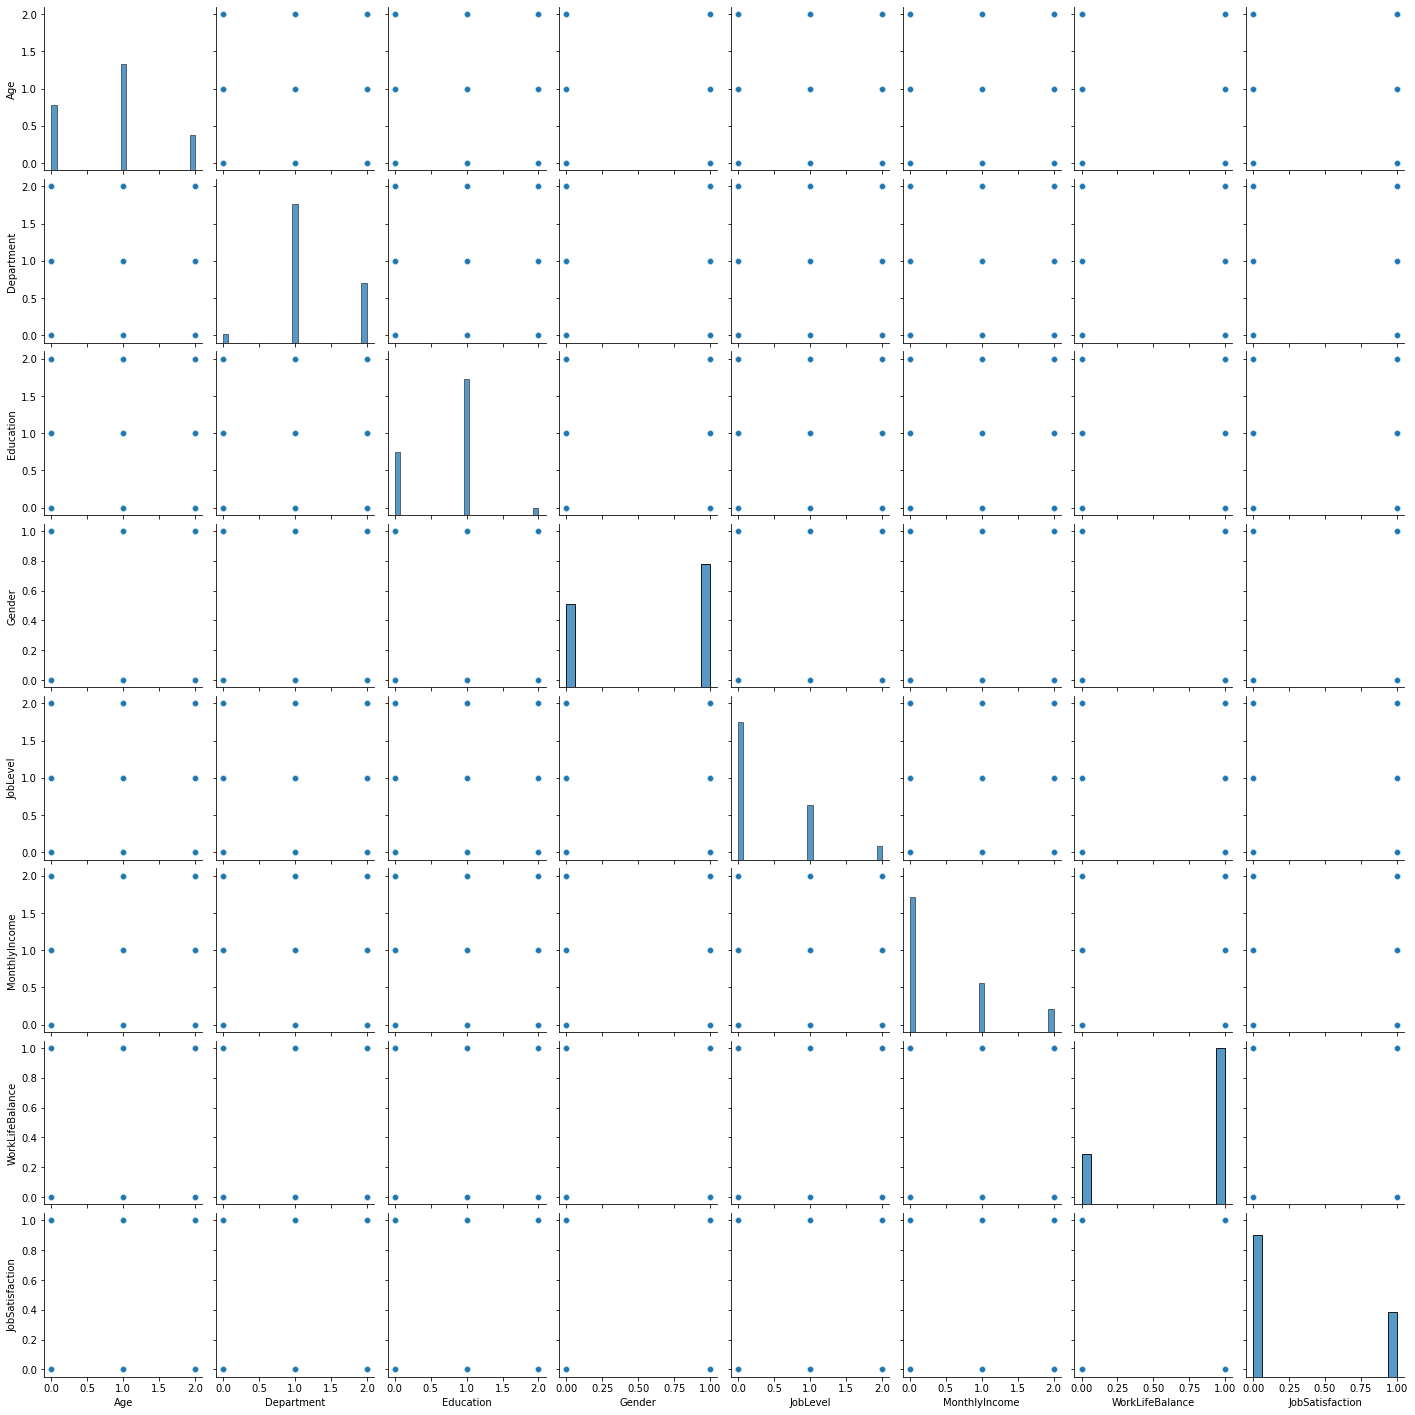

In [608]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='JobSatisfaction'>

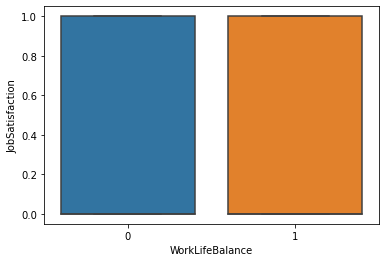

In [609]:
sns.boxplot(x='WorkLifeBalance', y='JobSatisfaction', data = df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobSatisfaction'>

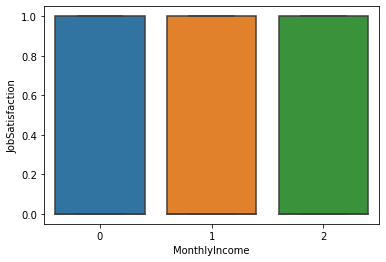

In [610]:
sns.boxplot(x='MonthlyIncome', y='JobSatisfaction', data = df)

<AxesSubplot:xlabel='Gender', ylabel='JobLevel'>

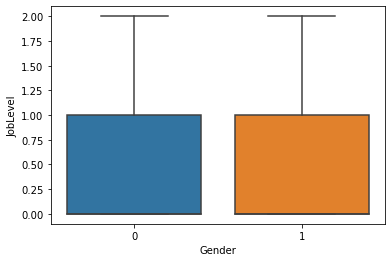

In [611]:
sns.boxplot(x='Gender', y='JobLevel', data = df)

<AxesSubplot:xlabel='Education', ylabel='JobLevel'>

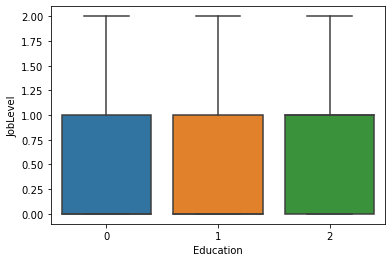

In [612]:
sns.boxplot(x='Education', y='JobLevel', data = df)

<AxesSubplot:xlabel='JobLevel', ylabel='WorkLifeBalance'>

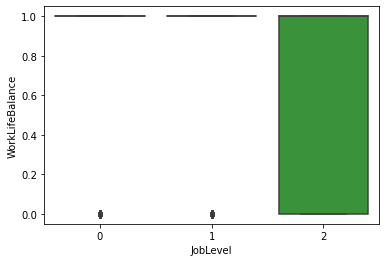

In [613]:
sns.boxplot(x='JobLevel', y='WorkLifeBalance', data = df)

In [392]:
import numpy as np
import itertools

def compute_cpd(data, variable, evidences=None):
    variable_support = sorted(data[variable].unique())
    m = len(variable_support)
    #print(m)
    
    if evidences is None:
        n = 1
        rows_constraints = [[]]
    else:
        rows_constraints = list(itertools.product(*[sorted(data[evidence].unique()) for evidence in evidences]))
        n = len(rows_constraints)
        #print(rows_constraints)
                
    cpd = pd.DataFrame(np.zeros((n,m)), columns=variable_support)
    #print(cpd)
    
    index = []
                
    for row,row_constraints in enumerate(rows_constraints):
        #print(f'Row {row}')
        data_supp = data.copy()
        idx = ''
        for i,constr in enumerate(row_constraints):
            evidence = evidences[i]
            #print(f'\t{evidence}=={constr}')
            idx += f' {evidence}=={constr} '
            data_supp = data_supp[data_supp[evidence]==constr]
        #print(data_supp[variable].count() )
        new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count() 
                   for variable_value in variable_support]
        #print(len(new_row))
        #print(new_row)
        cpd.iloc[row,:] = new_row 
        index.append(idx)
        
    values = {variable_value:cpd[variable_value].mean() for variable_value in variable_support}
    cpd = cpd.fillna(values)
        
    cpd['Evidences'] = index
    cpd = cpd.set_index('Evidences')
    
    cpd.columns.name = variable
        
    return cpd

In [390]:
compute_cpd(data=df, variable='Age')

Age,0,1,2
Evidences,,,
,0.314765,0.516223,0.169011


In [193]:
(df['Age']==0).sum()/df.shape[0]

0.3147653763220043

In [194]:
(df['Age']==1).sum()/df.shape[0]

0.5162234315638156

In [195]:
(df['Age']==2).sum()/df.shape[0]

0.16901119211418011

In [393]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.598561,0.329868,0.071571
Age==0 Education==1,0.507074,0.366440,0.126486
Age==0 Education==2,0.354167,0.489583,0.156250
Age==1 Education==0,0.496901,0.355450,0.147649
Age==1 Education==1,0.390421,0.401306,0.208273
Age==1 Education==2,0.293839,0.398104,0.308057
Age==2 Education==0,0.396717,0.400821,0.202462
Age==2 Education==1,0.281913,0.395010,0.323077
Age==2 Education==2,0.179487,0.346154,0.474359


In [197]:
df['Age'].unique(), df['Education'].unique()

(array([2, 1, 0], dtype=int64), array([0, 1, 2], dtype=int64))

In [394]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.5985605757696921

In [395]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==1].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.3298680527788884

In [396]:
(df['Age'][df['Age']==0][df['Education']==0][df['JobLevel']==2].count())/(df['Age'][df['Age']==0][df['Education']==0].count())

0.07157137145141944

In [397]:
(df['Age'][df['Age']==0][df['Education']==2][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==2].count())

0.3541666666666667

In [398]:
(df['Age'][df['Age']==0][df['Education']==1][df['JobLevel']==0].count())/(df['Age'][df['Age']==0][df['Education']==1].count())

0.5070741369552915

In [399]:
(df['Age'][df['Age']==0][df['Education']==2][df['JobLevel']==2].count())/(df['Age'][df['Age']==0][df['Education']==2].count())

0.15625

In [400]:
(df['Age'][df['Age']==2][df['Education']==2][df['JobLevel']==2].count())/(df['Age'][df['Age']==2][df['Education']==2].count())

0.47435897435897434

In [401]:
import itertools
list(itertools.product([1,2,3],[3,4,5],['a','b']))

[(1, 3, 'a'),
 (1, 3, 'b'),
 (1, 4, 'a'),
 (1, 4, 'b'),
 (1, 5, 'a'),
 (1, 5, 'b'),
 (2, 3, 'a'),
 (2, 3, 'b'),
 (2, 4, 'a'),
 (2, 4, 'b'),
 (2, 5, 'a'),
 (2, 5, 'b'),
 (3, 3, 'a'),
 (3, 3, 'b'),
 (3, 4, 'a'),
 (3, 4, 'b'),
 (3, 5, 'a'),
 (3, 5, 'b')]

In [143]:
def f(e):
    if e>=1 and e<=2:
        return 0
    elif e>=3 and e<=4:
        return 1
    else: 
        return 2

df_t = df.copy()

df_t['Education'] = df['Education'].map(f)

In [144]:
df_t['JobLevel'] = df['JobLevel'].map(f)

In [153]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
Row 0
	Age==0
	Education==0
2007
[0.8086696562032885, 0.16741405082212257, 0.02391629297458894]
Row 1
	Age==0
	Education==1
2490
[0.8485943775100402, 0.12008032128514057, 0.03132530120481928]
Row 2
	Age==0
	Education==2
48
[1.0, 0.0, 0.0]
Row 3
	Age==1
	Education==0
2357
[0.7878659312685617, 0.171828595672465, 0.04030547305897327]
Row 4
	Age==1
	Education==1
5757
[0.7476116032655897, 0.22546465172833072, 0.026923745006079556]
Row 5
	Age==1
	Education==2
312
[0.5993589743589743, 0.375, 0.02564102564102564]
Row 6
	Age==2
	Education==0
1195
[0.6133891213389121, 0.27364016736401675, 0.11297071129707113]
Row 7
	Age==2
	Education==1
3112
[0.653598971722365, 0.25931876606683807, 0.08708226221079692]
Row 8
	Age==2
	Education==2
252
[0.6904761904761905, 0.2777777777777778, 0.031746031746031744]
Row 9
	Age==3
	Education==0
416
[0.6153846153846154, 0.3293269230769231, 0.055288461538461536]
Row 10
	A

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.808670,0.167414,0.023916
Age==0 Education==1,0.848594,0.120080,0.031325
Age==0 Education==2,1.000000,0.000000,0.000000
Age==1 Education==0,0.787866,0.171829,0.040305
Age==1 Education==1,0.747612,0.225465,0.026924
Age==1 Education==2,0.599359,0.375000,0.025641
Age==2 Education==0,0.613389,0.273640,0.112971
Age==2 Education==1,0.653599,0.259319,0.087082
Age==2 Education==2,0.690476,0.277778,0.031746


In [158]:
def f(e):
    if e>=0 and e<=1:
        return 0
    elif e>=2 and e<3:
        return 1
    else: 
        return 2

df_t['Age'] = df['Age'].map(f)

In [159]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

3
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Row 0
	Age==0
	Education==0
4364
[0.7974335472043996, 0.16979835013748854, 0.03276810265811182]
Row 1
	Age==0
	Education==1
8247
[0.7781011276827937, 0.19364617436643627, 0.028252697950769977]
Row 2
	Age==0
	Education==2
360
[0.6527777777777778, 0.325, 0.022222222222222223]
Row 3
	Age==1
	Education==0
1195
[0.6133891213389121, 0.27364016736401675, 0.11297071129707113]
Row 4
	Age==1
	Education==1
3112
[0.653598971722365, 0.25931876606683807, 0.08708226221079692]
Row 5
	Age==1
	Education==2
252
[0.6904761904761905, 0.2777777777777778, 0.031746031746031744]
Row 6
	Age==2
	Education==0
416
[0.6153846153846154, 0.3293269230769231, 0.055288461538461536]
Row 7
	Age==2
	Education==1
1470
[0.5170068027210885, 0.37210884353741497, 0.1108843537414966]
Row 8
	Age==2
	Education==2
62
[0.3870967741935484, 0.5, 0.11290322580645161]


JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.797434,0.169798,0.032768
Age==0 Education==1,0.778101,0.193646,0.028253
Age==0 Education==2,0.652778,0.325000,0.022222
Age==1 Education==0,0.613389,0.273640,0.112971
Age==1 Education==1,0.653599,0.259319,0.087082
Age==1 Education==2,0.690476,0.277778,0.031746
Age==2 Education==0,0.615385,0.329327,0.055288
Age==2 Education==1,0.517007,0.372109,0.110884
Age==2 Education==2,0.387097,0.500000,0.112903


In [160]:
df.describe()

,Age,Department,Education,Gender,JobLevel,MonthlyIncome,WorkLifeBalance,JobSatisfaction
count,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000,19478.000000
mean,1.200739,0.617569,2.924274,0.402146,2.104990,0.802495,2.769689,2.752849
std,0.909498,0.901080,1.026008,0.490344,1.115506,0.974312,0.700480,1.097875
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,2.000000
50%,1.000000,0.000000,3.000000,0.000000,2.000000,1.000000,3.000000,3.000000
75%,2.000000,2.000000,4.000000,1.000000,3.000000,1.000000,3.000000,4.000000
max,3.000000,2.000000,5.000000,1.000000,5.000000,3.000000,4.000000,4.000000


In [210]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0,0.797434,0.169798,0.032768
Age==0 Education==1,0.778101,0.193646,0.028253
Age==0 Education==2,0.652778,0.325000,0.022222
Age==1 Education==0,0.613389,0.273640,0.112971
Age==1 Education==1,0.653599,0.259319,0.087082
Age==1 Education==2,0.690476,0.277778,0.031746
Age==2 Education==0,0.615385,0.329327,0.055288
Age==2 Education==1,0.517007,0.372109,0.110884
Age==2 Education==2,0.387097,0.500000,0.112903


In [212]:
compute_cpd(data=df_t, variable='JobLevel', evidences=['Age','Education']).values.T

array([[0.79743355, 0.77810113, 0.65277778, 0.61338912, 0.65359897,
        0.69047619, 0.61538462, 0.5170068 , 0.38709677],
       [0.16979835, 0.19364617, 0.325     , 0.27364017, 0.25931877,
        0.27777778, 0.32932692, 0.37210884, 0.5       ],
       [0.0327681 , 0.0282527 , 0.02222222, 0.11297071, 0.08708226,
        0.03174603, 0.05528846, 0.11088435, 0.11290323]])

In [402]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education','Gender'])

JobLevel,0,1,2
Evidences,,,
Age==0 Education==0 Gender==0,0.791802,0.173679,0.034520
Age==0 Education==0 Gender==1,0.484752,0.421855,0.093393
Age==0 Education==1 Gender==0,0.649965,0.292971,0.057063
Age==0 Education==1 Gender==1,0.409156,0.416786,0.174058
Age==0 Education==2 Gender==0,0.500000,0.416667,0.083333
Age==0 Education==2 Gender==1,0.305556,0.513889,0.180556
Age==1 Education==0 Gender==0,0.669124,0.260829,0.070046
Age==1 Education==0 Gender==1,0.384198,0.417370,0.198432
Age==1 Education==1 Gender==0,0.496992,0.375564,0.127444


In [222]:
df['Age'][df['Age']==0][df['Education']==0][df['Gender']==0][df['JobLevel']==2].count()/df['Age'][df['Age']==0][df['Education']==0][df['Gender']==0].count()

0.020330368487928845

In [224]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age','Education','Gender']).iloc[0].sum()

0.9999999999999999

In [226]:
compute_cpd(data=df, variable='MonthlyIncome', evidences=['JobLevel','Department'])

MonthlyIncome,0,1,2
Evidences,,,
JobLevel==0 Department==0,0.968955,0.030211,0.000833
JobLevel==0 Department==1,0.967797,0.030508,0.001695
JobLevel==0 Department==2,0.934760,0.064475,0.000765
JobLevel==1 Department==0,0.042878,0.663154,0.293968
JobLevel==1 Department==1,0.000000,0.559441,0.440559
JobLevel==1 Department==2,0.034483,0.743746,0.221771
JobLevel==2 Department==0,0.008511,0.000000,0.991489
JobLevel==2 Department==1,0.024390,0.000000,0.975610
JobLevel==2 Department==2,0.004902,0.000000,0.995098


In [359]:
compute_cpd(data=df, variable='WorkLifeBalance', evidences=['JobLevel','Department'])

{0: 0.24622525663577408, 1: 0.7537747433642259}


WorkLifeBalance,0,1
Evidences,,
JobLevel==0 Department==0,0.300865,0.699135
JobLevel==0 Department==1,0.311864,0.688136
JobLevel==0 Department==2,0.245158,0.754842
JobLevel==1 Department==0,0.284884,0.715116
JobLevel==1 Department==1,0.111888,0.888112
JobLevel==1 Department==2,0.293442,0.706558
JobLevel==2 Department==0,0.296454,0.703546
JobLevel==2 Department==1,0.219512,0.780488
JobLevel==2 Department==2,0.151961,0.848039


In [403]:
import numpy as np

def compute_cpd(data, variable, evidences=None):
    variable_support = sorted(data[variable].unique())
    m = len(variable_support)
    #print(m)
    
    if evidences is None:
        n = 1
        rows_constraints = [[]]
    else:
        rows_constraints = list(itertools.product(*[sorted(data[evidence].unique()) for evidence in evidences]))
        n = len(rows_constraints)
        #print(rows_constraints)
                
    cpd = pd.DataFrame(np.zeros((n,m)), columns=variable_support)
    #print(cpd)
    
    index = []
                
    for row,row_constraints in enumerate(rows_constraints):
        #print(f'Row {row}')
        data_supp = data.copy()
        idx = ''
        for i,constr in enumerate(row_constraints):
            evidence = evidences[i]
            #print(f'\t{evidence}=={constr}')
            idx += f' {evidence}=={constr} '
            data_supp = data_supp[data_supp[evidence]==constr]
        #print(data_supp[variable].count() )
        new_row = [data_supp[variable][data_supp[variable]==variable_value].count()/data_supp[variable].count() 
                   for variable_value in variable_support]
        #print(len(new_row))
        #print(new_row)
        cpd.iloc[row,:] = new_row 
        index.append(idx)
        
    values = {variable_value:cpd.fillna(0.0)[variable_value].mean() for variable_value in variable_support[:-1]}
    values[variable_support[-1]] = 1-sum([fill for v,fill in values.items()])
    print(values)
    cpd = cpd.fillna(values)
        
    cpd['Evidences'] = index
    cpd = cpd.set_index('Evidences')
    
    cpd.columns.name = variable
        
    return cpd

In [404]:
cpd = compute_cpd(data=df, variable='JobSatisfaction', evidences=['JobLevel', 'MonthlyIncome'])
cpd

{0: 0.17059503499104156, 1: 0.8294049650089584}


JobSatisfaction,0,1
Evidences,,
JobLevel==0 MonthlyIncome==0,0.227244,0.772756
JobLevel==0 MonthlyIncome==1,0.235005,0.764995
JobLevel==0 MonthlyIncome==2,0.185393,0.814607
JobLevel==1 MonthlyIncome==0,0.232078,0.767922
JobLevel==1 MonthlyIncome==1,0.175811,0.824189
JobLevel==1 MonthlyIncome==2,0.069767,0.930233
JobLevel==2 MonthlyIncome==0,0.245482,0.754518
JobLevel==2 MonthlyIncome==1,0.121025,0.878975
JobLevel==2 MonthlyIncome==2,0.043550,0.956450


In [251]:
for row in range(cpd.shape[0]):
    print(cpd.iloc[row].sum())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [405]:
cpd = compute_cpd(data=df, variable='JobSatisfaction', evidences=['JobLevel', 'MonthlyIncome','WorkLifeBalance'])
cpd

{0: 0.20417638084570727, 1: 0.7958236191542927}


JobSatisfaction,0,1
Evidences,,
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==0,0.357855,0.642145
JobLevel==0 MonthlyIncome==0 WorkLifeBalance==1,0.208136,0.791864
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==0,0.350694,0.649306
JobLevel==0 MonthlyIncome==1 WorkLifeBalance==1,0.215922,0.784078
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==0,0.176471,0.823529
JobLevel==0 MonthlyIncome==2 WorkLifeBalance==1,0.186335,0.813665
JobLevel==1 MonthlyIncome==0 WorkLifeBalance==0,0.394209,0.605791
JobLevel==1 MonthlyIncome==0 WorkLifeBalance==1,0.208865,0.791135
JobLevel==1 MonthlyIncome==1 WorkLifeBalance==0,0.250936,0.749064


In [254]:
for row in range(cpd.shape[0]):
    print(cpd.iloc[row].sum())

1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [256]:
!pip install pgmpy

     ---------------------------------------- 1.9/1.9 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 161.9/161.9 MB 2.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\pitti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [550]:
from pgmpy.models import BayesianNetwork

job_satisfaction_model = BayesianNetwork(
    [
        ('Age', 'JobLevel'),
        ('Education', 'JobLevel'),
        ('Gender', 'JobLevel'),
        ('Department', 'MonthlyIncome'),
        ('JobLevel', 'MonthlyIncome'),
        ('Department', 'WorkLifeBalance'),
        ('JobLevel', 'WorkLifeBalance'),
        ('JobLevel', 'JobSatisfaction'),
        ('MonthlyIncome', 'JobSatisfaction'),
        ('WorkLifeBalance', 'JobSatisfaction'),
    ]
)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19478 entries, 0 to 19477
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              19478 non-null  int64
 1   Department       19478 non-null  int64
 2   Education        19478 non-null  int64
 3   Gender           19478 non-null  int64
 4   JobLevel         19478 non-null  int64
 5   MonthlyIncome    19478 non-null  int64
 6   WorkLifeBalance  19478 non-null  int64
 7   JobSatisfaction  19478 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


In [551]:
from pgmpy.estimators import BayesianEstimator

In [552]:
job_satisfaction_model.fit(data=df)

In [553]:
print(str(job_satisfaction_model.get_cpds('JobLevel')))

+-------------+----------------------+-----+---------------------+--------------+
| Age         | Age(0)               | ... | Age(2)              | Age(2)       |
+-------------+----------------------+-----+---------------------+--------------+
| Education   | Education(0)         | ... | Education(2)        | Education(2) |
+-------------+----------------------+-----+---------------------+--------------+
| Gender      | Gender(0)            | ... | Gender(0)           | Gender(1)    |
+-------------+----------------------+-----+---------------------+--------------+
| JobLevel(0) | 0.9083063646170443   | ... | 0.3684210526315789  | 0.25         |
+-------------+----------------------+-----+---------------------+--------------+
| JobLevel(1) | 0.08198489751887811  | ... | 0.35526315789473684 | 0.475        |
+-------------+----------------------+-----+---------------------+--------------+
| JobLevel(2) | 0.009708737864077669 | ... | 0.27631578947368424 | 0.275        |
+-------------+-

In [554]:
cpd = job_satisfaction_model.get_cpds('JobLevel')

In [555]:
cpd.get_values().T

array([[0.90830636, 0.0819849 , 0.00970874],
       [0.73888183, 0.23252859, 0.02858958],
       [0.78983994, 0.19554628, 0.01461378],
       [0.64616118, 0.29756795, 0.05627086],
       [0.58333333, 0.33333333, 0.08333333],
       [0.44444444, 0.40277778, 0.15277778],
       [0.82949309, 0.1483871 , 0.02211982],
       [0.64595899, 0.28829916, 0.06574186],
       [0.73195489, 0.22894737, 0.03909774],
       [0.59834515, 0.31276596, 0.08888889],
       [0.58247423, 0.31958763, 0.09793814],
       [0.45614035, 0.37280702, 0.17105263],
       [0.67021277, 0.26329787, 0.06648936],
       [0.49014085, 0.35211268, 0.15774648],
       [0.57305503, 0.32258065, 0.10436433],
       [0.48778682, 0.33900814, 0.17320503],
       [0.36842105, 0.35526316, 0.27631579],
       [0.25      , 0.475     , 0.275     ]])

In [556]:
compute_cpd(data=df, variable='JobLevel', evidences=['Age', 'Education','Gender']).values

{0: 0.5997194615915233, 1: 0.2956553082015385, 2: 0.10462523020693815}


array([[0.90830636, 0.0819849 , 0.00970874],
       [0.73888183, 0.23252859, 0.02858958],
       [0.78983994, 0.19554628, 0.01461378],
       [0.64616118, 0.29756795, 0.05627086],
       [0.58333333, 0.33333333, 0.08333333],
       [0.44444444, 0.40277778, 0.15277778],
       [0.82949309, 0.1483871 , 0.02211982],
       [0.64595899, 0.28829916, 0.06574186],
       [0.73195489, 0.22894737, 0.03909774],
       [0.59834515, 0.31276596, 0.08888889],
       [0.58247423, 0.31958763, 0.09793814],
       [0.45614035, 0.37280702, 0.17105263],
       [0.67021277, 0.26329787, 0.06648936],
       [0.49014085, 0.35211268, 0.15774648],
       [0.57305503, 0.32258065, 0.10436433],
       [0.48778682, 0.33900814, 0.17320503],
       [0.36842105, 0.35526316, 0.27631579],
       [0.25      , 0.475     , 0.275     ]])

In [557]:
job_satisfaction_model.check_model()

True

In [607]:
BayesianNetwork.load('job_satisfaction_model.bif', filetype='bif')

In [606]:
job_satisfaction_model.save('job_satisfaction_model.bif')

In [558]:
from pgmpy.inference import VariableElimination

In [559]:
job_satisfaction_inference = VariableElimination(job_satisfaction_model)

In [560]:
print(job_satisfaction_inference.query(['JobSatisfaction']))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.6855 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.3145 |
+--------------------+------------------------+


In [604]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.6686 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.3314 |
+--------------------+------------------------+


In [562]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':2}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.5821 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.4179 |
+--------------------+------------------------+


In [564]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':0}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.7047 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.2953 |
+--------------------+------------------------+


In [566]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4403 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5597 |
+--------------------+------------------------+


In [567]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2, 'WorkLifeBalance':1}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4333 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5667 |
+--------------------+------------------------+


In [573]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':2, 'JobLevel':2, 'WorkLifeBalance':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.4599 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.5401 |
+--------------------+------------------------+


In [575]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Education':2}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.6704 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.3296 |
+--------------------+------------------------+


In [572]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Gender':1, 'Education':2, 'Age':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.6520 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.3480 |
+--------------------+------------------------+


In [579]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'Department':2, 'WorkLifeBalance':1}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.6606 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.3394 |
+--------------------+------------------------+


In [581]:
print(job_satisfaction_inference.query(['JobLevel']))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.6631 |
+-------------+-----------------+
| JobLevel(1) |          0.2677 |
+-------------+-----------------+
| JobLevel(2) |          0.0692 |
+-------------+-----------------+


In [582]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.6001 |
+-------------+-----------------+
| JobLevel(1) |          0.2947 |
+-------------+-----------------+
| JobLevel(2) |          0.1052 |
+-------------+-----------------+


In [583]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'MonthlyIncome':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.3595 |
+-------------+-----------------+
| JobLevel(1) |          0.3810 |
+-------------+-----------------+
| JobLevel(2) |          0.2595 |
+-------------+-----------------+


In [584]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'Age':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.4508 |
+-------------+-----------------+
| JobLevel(1) |          0.3444 |
+-------------+-----------------+
| JobLevel(2) |          0.2048 |
+-------------+-----------------+


In [585]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'Education':2}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.3950 |
+-------------+-----------------+
| JobLevel(1) |          0.3803 |
+-------------+-----------------+
| JobLevel(2) |          0.2246 |
+-------------+-----------------+


In [586]:
print(job_satisfaction_inference.query(['JobLevel'],{'JobSatisfaction':1, 'WorkLifeBalance':0, 'Gender':1}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.5372 |
+-------------+-----------------+
| JobLevel(1) |          0.3304 |
+-------------+-----------------+
| JobLevel(2) |          0.1324 |
+-------------+-----------------+


In [587]:
print(job_satisfaction_inference.query(['Gender']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4021 |
+-----------+---------------+
| Gender(1) |        0.5979 |
+-----------+---------------+


In [588]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.2329 |
+-----------+---------------+
| Gender(1) |        0.7671 |
+-----------+---------------+


In [591]:
print(job_satisfaction_inference.query(['Gender'], {'Education':0}))  # Independent

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4021 |
+-----------+---------------+
| Gender(1) |        0.5979 |
+-----------+---------------+


In [590]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2, 'Education':0}))  # V structure

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.1990 |
+-----------+---------------+
| Gender(1) |        0.8010 |
+-----------+---------------+


In [592]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2, 'Age':0}))  # V structure

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.1693 |
+-----------+---------------+
| Gender(1) |        0.8307 |
+-----------+---------------+


In [593]:
print(job_satisfaction_inference.query(['Gender'], {'JobLevel':2, 'Age':0, 'Education':0}))  # V structure

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.1859 |
+-----------+---------------+
| Gender(1) |        0.8141 |
+-----------+---------------+


In [589]:
print(job_satisfaction_inference.query(['Gender'], {'WorkLifeBalance':1}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4027 |
+-----------+---------------+
| Gender(1) |        0.5973 |
+-----------+---------------+


In [594]:
print(job_satisfaction_inference.query(['Education']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.3068 |
+--------------+------------------+
| Education(1) |           0.6586 |
+--------------+------------------+
| Education(2) |           0.0346 |
+--------------+------------------+


In [595]:
print(job_satisfaction_inference.query(['Education'], {'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.2301 |
+--------------+------------------+
| Education(1) |           0.6904 |
+--------------+------------------+
| Education(2) |           0.0795 |
+--------------+------------------+


In [597]:
print(job_satisfaction_inference.query(['Education'], {'JobLevel':2, 'Gender':0}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.1967 |
+--------------+------------------+
| Education(1) |           0.6968 |
+--------------+------------------+
| Education(2) |           0.1066 |
+--------------+------------------+


In [598]:
print(job_satisfaction_inference.query(['Education'], {'JobLevel':2, 'Gender':0, 'Age':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+------------------+
| Education    |   phi(Education) |
+==============+==================+
| Education(0) |           0.1923 |
+--------------+------------------+
| Education(1) |           0.6215 |
+--------------+------------------+
| Education(2) |           0.1862 |
+--------------+------------------+


In [600]:
print(job_satisfaction_inference.query(['Age']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3148 |
+--------+------------+
| Age(1) |     0.5162 |
+--------+------------+
| Age(2) |     0.1690 |
+--------+------------+


In [601]:
print(job_satisfaction_inference.query(['Age'], {'JobLevel':0}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3458 |
+--------+------------+
| Age(1) |     0.5199 |
+--------+------------+
| Age(2) |     0.1343 |
+--------+------------+


In [602]:
print(job_satisfaction_inference.query(['Age'], {'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.1672 |
+--------+------------+
| Age(1) |     0.4849 |
+--------+------------+
| Age(2) |     0.3478 |
+--------+------------+


In [603]:
print(job_satisfaction_inference.query(['Age'], {'JobLevel':2, 'Gender':0, 'Education':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.1189 |
+--------+------------+
| Age(1) |     0.4441 |
+--------+------------+
| Age(2) |     0.4370 |
+--------+------------+


In [421]:
# Modest job with modest education with hard-work, plus middle salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0, 'MonthlyIncome':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.3579 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.6421 |
+--------------------+------------------------+


In [422]:
# Same of before, but high salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':0, 'Education':0, 'JobLevel':0, 'MonthlyIncome':2}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1765 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8235 |
+--------------------+------------------------+


In [423]:
# High job, with high work-life balance
print(job_satisfaction_inference.query(['JobSatisfaction'],{'WorkLifeBalance':1, 'JobLevel':2}))

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.0996 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.9004 |
+--------------------+------------------------+


In [424]:
# Same as before, plus middle salary
print(job_satisfaction_inference.query(['JobSatisfaction'],{'JobLevel':2, 'WorkLifeBalance':1, 'MonthlyIncome':0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.2240 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.7760 |
+--------------------+------------------------+


In [425]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1857 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8143 |
+--------------------+------------------------+


In [426]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1, 'Department':2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1879 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8121 |
+--------------------+------------------------+


In [427]:
print(job_satisfaction_inference.query(['JobSatisfaction'],{'MonthlyIncome':1, 'Department':2, 'Age':0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+--------------------+------------------------+
| JobSatisfaction    |   phi(JobSatisfaction) |
+====================+========================+
| JobSatisfaction(0) |                 0.1971 |
+--------------------+------------------------+
| JobSatisfaction(1) |                 0.8029 |
+--------------------+------------------------+


In [428]:
print(job_satisfaction_inference.query(['Gender']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.4021 |
+-----------+---------------+
| Gender(1) |        0.5979 |
+-----------+---------------+


In [429]:
print(job_satisfaction_inference.query(['Gender'],{'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.3963 |
+-----------+---------------+
| Gender(1) |        0.6037 |
+-----------+---------------+


In [430]:
print(job_satisfaction_inference.query(['Gender'],{'JobSatisfaction':1, 'Department':2}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+---------------+
| Gender    |   phi(Gender) |
+===========+===============+
| Gender(0) |        0.3961 |
+-----------+---------------+
| Gender(1) |        0.6039 |
+-----------+---------------+


In [431]:
print(job_satisfaction_inference.query(['MonthlyIncome']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.5413 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.2908 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1679 |
+------------------+----------------------+


In [467]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'JobLevel':0}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.9590 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.0401 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.0009 |
+------------------+----------------------+


In [469]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'Education':0, 'JobSatisfaction':1}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7214 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1639 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1146 |
+------------------+----------------------+


In [473]:
print(job_satisfaction_inference.query(['MonthlyIncome'], {'Education':0, 'JobSatisfaction':1, 'Department':0}))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------------+----------------------+
| MonthlyIncome    |   phi(MonthlyIncome) |
+==================+======================+
| MonthlyIncome(0) |               0.7292 |
+------------------+----------------------+
| MonthlyIncome(1) |               0.1536 |
+------------------+----------------------+
| MonthlyIncome(2) |               0.1172 |
+------------------+----------------------+


In [474]:
print(job_satisfaction_inference.query(['WorkLifeBalance']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| WorkLifeBalance    |   phi(WorkLifeBalance) |
+====================+========================+
| WorkLifeBalance(0) |                 0.2825 |
+--------------------+------------------------+
| WorkLifeBalance(1) |                 0.7175 |
+--------------------+------------------------+


In [483]:
print(job_satisfaction_inference.query(['WorkLifeBalance'], {'JobSatisfaction':0}))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------------+------------------------+
| WorkLifeBalance    |   phi(WorkLifeBalance) |
+====================+========================+
| WorkLifeBalance(0) |                 0.2733 |
+--------------------+------------------------+
| WorkLifeBalance(1) |                 0.7267 |
+--------------------+------------------------+


In [484]:
print(job_satisfaction_inference.query(['JobLevel']))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.7257 |
+-------------+-----------------+
| JobLevel(1) |          0.2226 |
+-------------+-----------------+
| JobLevel(2) |          0.0517 |
+-------------+-----------------+


In [486]:
print(job_satisfaction_inference.query(['JobLevel'], {'JobSatisfaction':1}))

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+-------------+-----------------+
| JobLevel    |   phi(JobLevel) |
+=============+=================+
| JobLevel(0) |          0.7338 |
+-------------+-----------------+
| JobLevel(1) |          0.2146 |
+-------------+-----------------+
| JobLevel(2) |          0.0516 |
+-------------+-----------------+


In [487]:
print(job_satisfaction_inference.query(['Age']))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3148 |
+--------+------------+
| Age(1) |     0.5162 |
+--------+------------+
| Age(2) |     0.1691 |
+--------+------------+
